# Importing packages

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

pd.options.display.max_colwidth = 500

# Importing data

https://drive.google.com/drive/folders/1mx-CAzT10YKrmxHfYDP_1Oef7PVGUr7s?usp=sharing

In [16]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [20]:
data = pd.read_csv('/content/drive/MyDrive/Google_Colab/NLP_Classification_Toxic_Comments/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess t...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


# First look

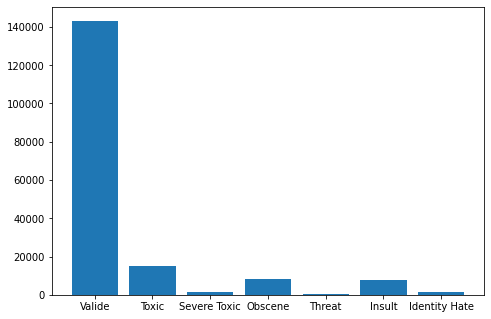

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
types = ['Valide', 'Toxic', 'Severe Toxic','Obscene', 'Threat', 'Insult', 'Identity Hate']
values = [
          len(data[(data['toxic'] == 0) & (data['severe_toxic'] == 0) & (data['obscene'] == 0) & (data['threat'] == 0) & (data['insult'] == 0) & (data['identity_hate'] == 0)]),
          data['toxic'].value_counts()[1],
          data['severe_toxic'].value_counts()[1],
          data['obscene'].value_counts()[1],
          data['threat'].value_counts()[1],
          data['insult'].value_counts()[1],
          data['identity_hate'].value_counts()[1],
          ]
ax.bar(types,values)
plt.show()

In [55]:
print("Number comments in dataframe : {}".format(len(data.index)))

Number comments in dataframe : 159571


Compute max length of a comment:

In [47]:
max_length = max(len(comment.split()) for comment in data["comment_text"])

print("Max size comment : {}".format(max_length))

Taille du commentaire le plus long : 1411


Average size of a comment:

In [51]:
average_size = 0
for line in data["comment_text"]:
  words = line.split()
  average_size = average_size + len(words)
average_size = average_size/len(data.index)

print("Average size comment : {} ".format(average_size))

Average size comment : 67.27352714465661 


# 1 - First try with a simple ML to get first idea

# Preparation of the data

In [56]:
df_idf = data.copy()